<a href="https://colab.research.google.com/github/DreamFactory100/GNN/blob/main/GraphData_Handling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 그래프 데이터 다루기
# Link : https://pytorch-geometric.readthedocs.io/en/latest/get_started/introduction.html

# 라이브러리 설치
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

In [ ]:
# 그래프 데이터의 특징(feature)
#
# data.x:          노드 피처 매트릭스 [num_nodes, num_node_features]
# data.edge_index: 그래프 연결성. COO(COOrdinate) 포맷 [2, num_edges], torch.long 타입
# data.edge_attr:  엣지 피터 매트릭스 [num_edges, num_edge_features]
# data.y:          훈련 목표(Target) - 노드 [num_nodes, *], 그래프 [1, *]
# data.pos:        노드 위치 매트릭스 [num_nodes, num_dimensions]

import torch
from torch_geometric.data import Data

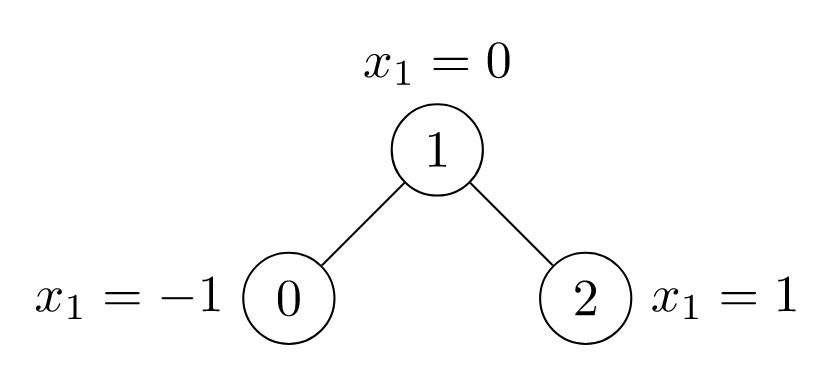

In [ ]:
# 그래프 데이터 생성
# 입력 : [ [ 소스 노드 ],  [ 타켓 노드 ]]
#
edge_index = torch.tensor([[0, 1, 1, 2],
                           [1, 0, 2, 1]], dtype=torch.long)
x = torch.tensor([[-1], [0], [1]], dtype=torch.float)

data = Data(x=x, edge_index=edge_index)
print("data == ", data)
print("data.x == ", data.x)   # 해당 노드의 feature
print("data.y == ", data.y)   # 타겟.  아직 지정되지 않음

In [ ]:
# 엣지가 연결쌍일 경우,
# 입력을 변형한다.
# 

# edge_index = torch.tensor([[0, 1],
#                            [1, 0],
#                            [1, 2],
#                            [2, 1], [3,1]], dtype=torch.long)
# x = torch.tensor([[-1, 1], [0, 1], [1,2], [1,1]], dtype=torch.float)

edge_index = torch.tensor([[0, 1],
                           [1, 0],
                           [1, 2],
                           [2, 1],
                           ], dtype=torch.long)
x = torch.tensor([[-1 ], [0 ], [1 ] ], dtype=torch.float)

# print("edge_index.t() == ", edge_index.t() )
# print("edge_index.t().contiguous() == ", edge_index.t().contiguous() )

data = Data(x=x, edge_index=edge_index.t())
print("data == ", data)
print("data.x == ", data.x)
print("data.y == ", data.y)

In [ ]:
# 그래프 데이터의 유효성 검사
#
data.validate(raise_on_error=True)

In [ ]:
# 그래프 데이터 살펴보기
print(data.keys)

In [ ]:
print(data['x'])

In [ ]:
for key, item in data:
    print( key , " == ", item)

In [ ]:
print("egge_attr == ", data.edge_attr)
print("data.num_nodes == ", data.num_nodes)
print("data.num_edges == ", data.num_edges)
print("data.num_features == ", data.num_features)
print("data.has_isolated_nodes() == ", data.has_isolated_nodes())
print("data.has_self_loops() == " , data.has_self_loops())
print("data.is_directed() == ", data.is_directed())
print("data.is_cuda == ", data.is_cuda)                # 데이터 처리에 GPU 사용 여부

In [ ]:
# GPU 계산을 위한 변환
# Transfer data object to GPU.
#
device = torch.device('cuda')
data = data.to(device)

print("data.is_cuda == ", data.is_cuda)